In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


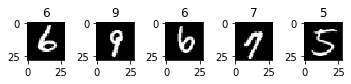

In [2]:
from tensorflow.keras.datasets import mnist

(trainX, trainy), (testX, testy) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testy.shape))

for j in range(5):
    i = np.random.randint(0, 10000)
    plt.subplot(550 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainy[i])
plt.show()

In [3]:
trainX = trainX/255
testX = testX/255
train_data = np.reshape(trainX, (60000, 28*28))
test_data = np.reshape(testX, (10000, 28*28))
print (train_data.shape, test_data.shape)

(60000, 784) (10000, 784)


In [10]:
import tensorflow

input_data = tensorflow.keras.layers.Input(shape=(784))

encoder = tensorflow.keras.layers.Dense(100)(input_data)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)

encoder = tensorflow.keras.layers.Dense(50)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)

encoder = tensorflow.keras.layers.Dense(25)(encoder)
encoder = tensorflow.keras.layers.Activation('relu')(encoder)

encoded = tensorflow.keras.layers.Dense(2)(encoder)

In [11]:
decoder = tensorflow.keras.layers.Dense(25)(encoded)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)

decoder = tensorflow.keras.layers.Dense(50)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)

decoder = tensorflow.keras.layers.Dense(100)(decoder)
decoder = tensorflow.keras.layers.Activation('relu')(decoder)

decoded = tensorflow.keras.layers.Dense(784)(decoder)

In [12]:
autoencoder = tensorflow.keras.models.Model(inputs=input_data, outputs=decoded)
autoencoder.compile(loss='mse', optimizer='adam')
autoencoder.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
activation_11 (Activation)   (None, 25)               

In [13]:
autoencoder.fit(train_data, train_data, epochs=30, batch_size=64, validation_data=(test_data, test_data))

Epoch 1/30
938/938 [==============================] - 2s 2ms/step - loss: 0.0529 - val_loss: 0.0470
Epoch 2/30
938/938 [==============================] - 1s 1ms/step - loss: 0.0459 - val_loss: 0.0450
Epoch 3/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0441 - val_loss: 0.0434
Epoch 4/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0429 - val_loss: 0.0421
Epoch 5/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0420 - val_loss: 0.0417
Epoch 6/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0413 - val_loss: 0.0408
Epoch 7/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0405 - val_loss: 0.0400
Epoch 8/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0401 - val_loss: 0.0397
Epoch 9/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0396 - val_loss: 0.0394
Epoch 10/30
938/938 [==============================] - 1s 2ms/step - loss: 0.0393 - val_loss: 0.0389

Real Images


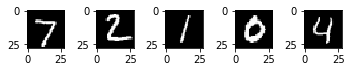

Reconstructed Images


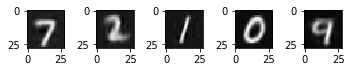

In [68]:
# Real Images
print ("Real Images")
for i in range(5):
    plt.subplot(550 + 1 + i)
    plt.imshow(testX[i], cmap='gray')
plt.show()

# Reconstructed Images
print ("Reconstructed Images")
for i in range(5):
    plt.subplot(550 + 1 + i)
    output = autoencoder.predict(np.array([test_data[i]]))
    op_image = np.reshape(output[0]*255, (28, 28))
    plt.imshow(op_image, cmap='gray')
plt.show()

In [26]:
dr_model = tensorflow.keras.models.Model(inputs=autoencoder.get_layer('input_3').input, outputs=autoencoder.get_layer('dense_14').output)
dr_model.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 100)               78500     
_________________________________________________________________
activation_9 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 50)                5050      
_________________________________________________________________
activation_10 (Activation)   (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 25)                1275      
_________________________________________________________________
activation_11 (Activation)   (None, 25)               

In [59]:
x = []
y = []
z = []
for i in range(10000):
    z.append(testy[i])
    op = dr_model.predict(np.array([test_data[i]]))
    x.append(op[0][0]*10000)
    y.append(op[0][1]*10000)

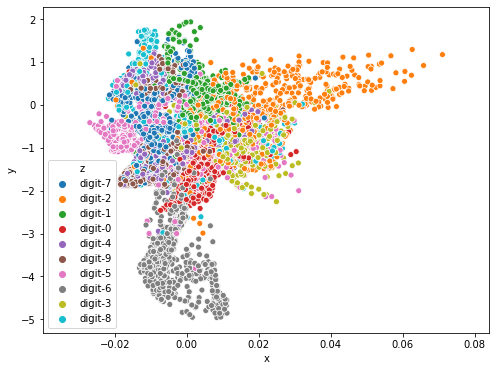

In [66]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df['z'] = ["digit-"+str(k) for k in z]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='z', data=df)
plt.show()